<a href="https://colab.research.google.com/github/biswajitburagohain/neural_net-practice/blob/master/convNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2020-05-21 13:12:14--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 66.102.1.128, 2a00:1450:400c:c0c::80
Connecting to storage.googleapis.com (storage.googleapis.com)|66.102.1.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  68.2MB/s    in 1.0s    

2020-05-21 13:12:16 (68.2 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [0]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_dogs_dir = os.path.join(train_dir, 'dogs')
train_cats_dir = os.path.join(train_dir, 'cats')

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')

In [31]:
print("total number of cats in train_dir", len(os.listdir(train_cats_dir)))
print("total number of dogs in train_dir", len(os.listdir(train_dogs_dir)))

print("total number of cats in validation_dir", len(os.listdir(validation_cats_dir)))
print("total number of dogs in validation_dir", len(os.listdir(validation_dogs_dir)))

total number of cats in train_dir 1000
total number of dogs in train_dir 1000
total number of cats in validation_dir 500
total number of dogs in validation_dir 500


In [0]:
import tensorflow as tf

In [0]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(200, activation= 'relu'),
                                    tf.keras.layers.Dense(1, activation='sigmoid')])

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 73984)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)              

In [0]:
from tensorflow.keras.optimizers import RMSprop

In [0]:
model.compile(RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
train_datagen = ImageDataGenerator(rescale = 1.0/255)
test_datagen = ImageDataGenerator(rescale = 1.0/255)

In [38]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (150, 150),
                                                    class_mode = 'binary',
                                                    batch_size = 100)

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                  class_mode = 'binary',
                                                  batch_size = 100,
                                                  target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [39]:
history = model.fit(train_generator, 
                    epochs = 20,
                    steps_per_epoch = 10,
                    validation_data = validation_generator,
                    validation_steps = 5,
                    verbose = 2
                    )

Epoch 1/20
10/10 - 5s - loss: 2.9688 - accuracy: 0.4840 - val_loss: 0.6906 - val_accuracy: 0.5060
Epoch 2/20
10/10 - 5s - loss: 0.6908 - accuracy: 0.5030 - val_loss: 0.6767 - val_accuracy: 0.6240
Epoch 3/20
10/10 - 5s - loss: 0.7552 - accuracy: 0.5580 - val_loss: 0.6793 - val_accuracy: 0.5480
Epoch 4/20
10/10 - 5s - loss: 0.6747 - accuracy: 0.5790 - val_loss: 0.6678 - val_accuracy: 0.6000
Epoch 5/20
10/10 - 5s - loss: 0.6618 - accuracy: 0.6250 - val_loss: 0.6431 - val_accuracy: 0.6520
Epoch 6/20
10/10 - 5s - loss: 0.7012 - accuracy: 0.5810 - val_loss: 0.6771 - val_accuracy: 0.5620
Epoch 7/20
10/10 - 5s - loss: 0.6677 - accuracy: 0.6160 - val_loss: 0.6701 - val_accuracy: 0.6200
Epoch 8/20
10/10 - 5s - loss: 0.6369 - accuracy: 0.6580 - val_loss: 0.6363 - val_accuracy: 0.6500
Epoch 9/20
10/10 - 5s - loss: 0.6193 - accuracy: 0.6890 - val_loss: 0.6739 - val_accuracy: 0.6120
Epoch 10/20
10/10 - 5s - loss: 0.5842 - accuracy: 0.6760 - val_loss: 0.8709 - val_accuracy: 0.5300
Epoch 11/20
10/10 -

In [40]:
from tensorflow.keras.preprocessing import image
import numpy as np
import os

file_name = 'dog2.jfif'
path = os.path.join('/content', file_name)
img = image.load_img(path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
images = np.vstack([x])
classes = model.predict(images, verbose = 0 )

print(classes)

if (classes[0] > 0):
  print(file_name + ' is a dog')
else:
  print('its a cat')

[[1.]]
dog2.jfif is a dog


In [0]:
acc = history.history['accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
val_acc =history.history['val_accuracy']

In [0]:
epoch_count = range(len(acc))

<Figure size 432x288 with 0 Axes>

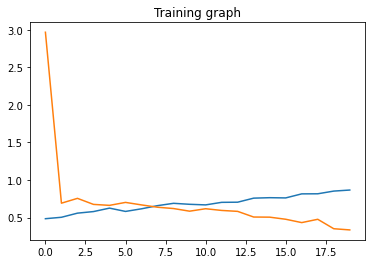

<Figure size 432x288 with 0 Axes>

In [56]:
import matplotlib.pyplot as plt
plt.plot(range(len(acc)), acc)
plt.plot(range(len(loss)), loss)
plt.title('Training graph')
plt.figure()

<Figure size 432x288 with 0 Axes>

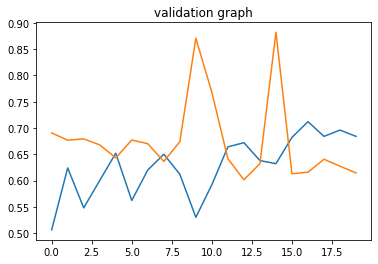

<Figure size 432x288 with 0 Axes>

In [58]:
plt.plot(range(len(val_acc)), val_acc)
plt.plot(range(len(val_loss)), val_loss)
plt.title('validation graph')
plt.figure()